# Importación de datos geoespaciales en python

Esta es una descripción de las bibliotecas esenciales de Python para importar y exportar datos geoespaciales, a modo de introducción al manejo de datos desde diferentes formatos y estándares.
Los datos geoespaciales a menudo están disponibles en formatos de archivo GIS específicos o almacenes de datos, en la mayor parte de los casos pueden ser datos tabulares CSV, archivos ESRI, GeoJSON, Geopackage, base de datos PostGIS (PostgreSQL) y raster. Podemos usar la biblioteca GeoPandas y Fiona para leer muchos de esos formatos. Respecto a los formatos de imágenes ráster puede estar en GeoTijf JPG2000, HDF5, ect.

In [2]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

## Importación desde vector

Cuando se trata de datos vectoriales la forma más simple de trabajar es con el uso combinado de shapely y geopandas. 

Con Shapely, se pueden crear objetos vectoriales (por ejemplo, Punto, Polígono, Multipolígono) y manipularlos, por ejemplo, buffer, calcular el área o una intersección, etc.

Geopandas permite tener un objeto denominado “GeoDataFrame” que añade carácter espacial a la librería pandas, mediante una columna 'geometry' que define la geometría de los registros. Las otras columnas son los atributos (o propiedades en GeoJSON) que describen cada una de las geometrías. Los GeoDataFrame tienen un atributo. geometry que siempre devuelve la columna con la información de geometría (en una GeoSeries). También dispone de métodos adicionales para trabajar con datos espaciales como por ejemplo (área, distancia, búfer, intersección, ...) como veremos en el apartado de analítica geoespacial.

Existen múltiples formatos, con Fiona (basado en GDAL) podemos ver que dispone de gran cantidad de driver específicos para cada formato. Si queremos instalar fiona con todos los drives disponibles en GDAL tendríamos que realizar la instalación con “pip install -I fiona --no-binary fiona”

In [2]:
import os
os.environ['HTTP_PROXY']=""
os.environ['HTTPS_PROXY']=""

In [3]:
import fiona
fiona.supported_drivers

{'AeronavFAA': 'r',
 'ARCGEN': 'r',
 'BNA': 'raw',
 'DXF': 'raw',
 'CSV': 'raw',
 'OpenFileGDB': 'r',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'GeoJSON': 'rw',
 'GeoJSONSeq': 'rw',
 'GPKG': 'rw',
 'GML': 'raw',
 'GPX': 'raw',
 'GPSTrackMaker': 'raw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'r',
 'S57': 'r',
 'SEGY': 'r',
 'SUA': 'r',
 'TopoJSON': 'r'}

A continuación, exponemos como podemos leer datos vectorial y raster diferentes librerías disponibles.

### Generación de vector por coordenadas

Shapely en sí mismo no proporciona opciones para leer/escribir formatos de vectores (por ejemplo, shapefiles o geojson), esto como veremos más adelante se gestiona por fiona o geopandas, sin embargo, shapely sí permite la creación de múltiples formatos vectoriales pasándole las coordenadas.

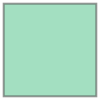

In [4]:
from shapely.geometry import Polygon
poly = Polygon([(0, 0), (0, 1), (1, 1), (1, 0)])
print(poly.exterior.coords)
poly

### Importación desde CSV

Los formatos tabulares como (CSV, Excel, etc. ) suelen contener las coordenadas espaciales en puntos (X, Y) o (latitud, longitud), que en si mismo no es un objeto “geometry”, por lo que para poder ser importado directamente a geopandas primero tenemos que crear este objeto de shapely correspondiente. En este caso, si no disponemos de metadatos necesitaremos conocer el sistema referencia de nuestros datos que en la mayoría de los caso suele ser 'epsg:4326'.

In [5]:
import geopandas as gpd
import pandas as pd
from shapely.geometry import Point
file = 'https://datos.madrid.es/egob/catalogo/202625-0-aparcamientos-publicos.csv'
df = pd.read_csv(file, sep=";", engine='python')
df.head()

PK                                             NOMBRE  \
0    13470              Aparcamiento mixto. Arquitecto Ribera   
1    59060  Aparcamiento mixto. Avenida de América (interc...   
2  5898885            Aparcamiento mixto. Avenida de Portugal   
3    13475                         Aparcamiento mixto. Brasil   
4   183747             Aparcamiento mixto. Casino de la Reina   

  DESCRIPCION-ENTIDAD                                            HORARIO  \
0                 NaN                                                NaN   
1                 NaN                                                NaN   
2                 NaN  Horario de apertura de 6:00 h a 22:00 h los dí...   
3                 NaN                                                NaN   
4                 NaN                                                NaN   

   EQUIPAMIENTO  TRANSPORTE  \
0           NaN         NaN   
1           NaN         NaN   
2           NaN         NaN   
3           NaN         NaN   
4           NaN         NaN   

                                         DESCRIPCION  ACCESIBILIDAD  \
0  Plazas: 318 públicas y 298 para residentesAbie...              0   
1  Información sobre accesibilidad:Tiene escalera...              0   
2  Plazas: 432 públicas y 437 para residentes Inf...              0   
3  Plazas: 226 públicas y 400 para residentesAbie...              0   
4  Plazas: 135 públicas y 449 para residentesAbie...              0   

                                         CONTENT-URL              NOMBRE-VIA  \
0  http://www.madrid.es/sites/v/index.jsp?vgnextc...                 BARCELO   
1  http://www.madrid.es/sites/v/index.jsp?vgnextc...      PRADENA DEL RINCON   
2  http://www.madrid.es/sites/v/index.jsp?vgnextc...                PORTUGAL   
3  http://www.madrid.es/sites/v/index.jsp?vgnextc...  GENERAL YAG&amp;Uuml;E   
4  http://www.madrid.es/sites/v/index.jsp?vgnextc...                  CASINO   

   ...   DISTRITO COORDENADA-X  COORDENADA-Y    LATITUD  LONGITUD  \
0  ...     CENTRO       440764       4475560  40.426688 -3.699617   
1  ...  CHAMARTIN       442725       4476896  40.438861 -3.676622   
2  ...     LATINA       437399       4473658  40.411180 -3.737832   
3  ...     TETUAN       441255       4478822  40.456108 -3.694132   
4  ...     CENTRO       440323       4473355  40.406793 -3.704609   

                       TELEFONO FAX                              EMAIL  \
0                           NaN NaN                                NaN   
1                   917 376 257 NaN  intercambiador@intercambiador.net   
2  917 877 292 (grúa municipal) NaN   aparcamientos@madridmovilidad.es   
3                           NaN NaN                                NaN   
4                           NaN NaN                                NaN   

                                                TIPO  Unnamed: 30  
0  /contenido/entidadesYorganismos/AparcamientosR...               
1  /contenido/entidadesYorganismos/AparcamientosR...               
2  /contenido/entidadesYorganismos/AparcamientosP...               
3  /contenido/entidadesYorganismos/AparcamientosR...               
4  /contenido/entidadesYorganismos/AparcamientosR...               

[5 rows x 31 columns]

Notar que en este caso las coordenadas están tanto en UTM como en Latitud, Longitud. Por tanto, en el siguiente paso insertaremos estas coordenadas en un objeto de puntos seleccionado el “epsg” correspondiente a nuestra decisión y refiriéndonos a las columnas en orden (df.LONGITUD, df.LATITUD).ipynb Para ello usaremos las geometrías de puntos de Shapely (shapely.geometry)

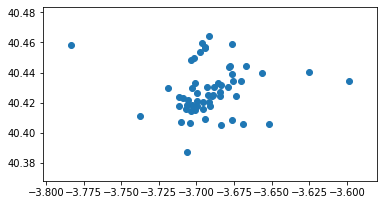

In [6]:
geometry = [Point(xy) for xy in zip(df.LONGITUD, df.LATITUD)]
gdf = gpd.GeoDataFrame(df, crs={'init': 'epsg:4326'}, geometry=geometry)
gdf.plot()

Otra forma de convertir un Dataframe a Geodataframe es directamente con el método de GeoPandas gpd.points_from_xy().
Al convertir su DataFrame a GeoDataFrame, obtiene una columna de "geometry" geometría adicional que representa registros de puntos, lineas y poligonos.

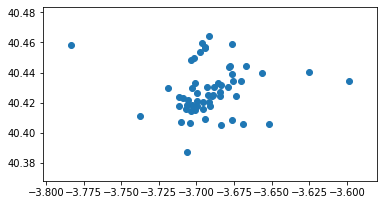

In [7]:
gdf2 = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.LONGITUD, df.LATITUD), crs={"init":"epsg:4326"})
gdf2.plot()

In [8]:
gdf2.head()

PK                                             NOMBRE  \
0    13470              Aparcamiento mixto. Arquitecto Ribera   
1    59060  Aparcamiento mixto. Avenida de América (interc...   
2  5898885            Aparcamiento mixto. Avenida de Portugal   
3    13475                         Aparcamiento mixto. Brasil   
4   183747             Aparcamiento mixto. Casino de la Reina   

  DESCRIPCION-ENTIDAD                                            HORARIO  \
0                 NaN                                                NaN   
1                 NaN                                                NaN   
2                 NaN  Horario de apertura de 6:00 h a 22:00 h los dí...   
3                 NaN                                                NaN   
4                 NaN                                                NaN   

   EQUIPAMIENTO  TRANSPORTE  \
0           NaN         NaN   
1           NaN         NaN   
2           NaN         NaN   
3           NaN         NaN   
4           NaN         NaN   

                                         DESCRIPCION  ACCESIBILIDAD  \
0  Plazas: 318 públicas y 298 para residentesAbie...              0   
1  Información sobre accesibilidad:Tiene escalera...              0   
2  Plazas: 432 públicas y 437 para residentes Inf...              0   
3  Plazas: 226 públicas y 400 para residentesAbie...              0   
4  Plazas: 135 públicas y 449 para residentesAbie...              0   

                                         CONTENT-URL              NOMBRE-VIA  \
0  http://www.madrid.es/sites/v/index.jsp?vgnextc...                 BARCELO   
1  http://www.madrid.es/sites/v/index.jsp?vgnextc...      PRADENA DEL RINCON   
2  http://www.madrid.es/sites/v/index.jsp?vgnextc...                PORTUGAL   
3  http://www.madrid.es/sites/v/index.jsp?vgnextc...  GENERAL YAG&amp;Uuml;E   
4  http://www.madrid.es/sites/v/index.jsp?vgnextc...                  CASINO   

   ... COORDENADA-X COORDENADA-Y    LATITUD  LONGITUD  \
0  ...       440764      4475560  40.426688 -3.699617   
1  ...       442725      4476896  40.438861 -3.676622   
2  ...       437399      4473658  40.411180 -3.737832   
3  ...       441255      4478822  40.456108 -3.694132   
4  ...       440323      4473355  40.406793 -3.704609   

                       TELEFONO  FAX                              EMAIL  \
0                           NaN  NaN                                NaN   
1                   917 376 257  NaN  intercambiador@intercambiador.net   
2  917 877 292 (grúa municipal)  NaN   aparcamientos@madridmovilidad.es   
3                           NaN  NaN                                NaN   
4                           NaN  NaN                                NaN   

                                                TIPO Unnamed: 30  \
0  /contenido/entidadesYorganismos/AparcamientosR...               
1  /contenido/entidadesYorganismos/AparcamientosR...               
2  /contenido/entidadesYorganismos/AparcamientosP...               
3  /contenido/entidadesYorganismos/AparcamientosR...               
4  /contenido/entidadesYorganismos/AparcamientosR...               

                    geometry  
0  POINT (-3.69962 40.42669)  
1  POINT (-3.67662 40.43886)  
2  POINT (-3.73783 40.41118)  
3  POINT (-3.69413 40.45611)  
4  POINT (-3.70461 40.40679)  

[5 rows x 32 columns]

### Importación desde GeoPackage
El formato GeoPackages es un estándar de la OGC que supera algunas de las limitaciones del resto de formatos vectoriales. Se pueden recomendar su uso para compartir información geoespacial por los siguientes motivos: 

    Es compacto, está basado en estándares de la OGC, e independiente de plataformas o aplicaciones. 
    Permite al almacenamiento de datos espaciales vectoriales y ráster. 
    Permite almacenar multimples geometrias (Point, Line, Polygon, MultiPoint, MultiLine, MultiPolygon, CompoundCurve, CurvedPolygon, MultiCurve y MultiSurface)
    Se ha diseñado para almacenar datos complejos y voluminosos (hasta 140 TB). 
    Casi todos los lenguajes de programación y software GIS son capaces de leer los archivos GeoPackage.


In [9]:
# Sí el gpkg solo tuviera una sola layer podemos usar
import geopandas as gpd
import fiona
file = "https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/SpatialDataModel/census2016_cca_tas_short.gpkg"
gdf = gpd.read_file(file)
gdf.head()

ced_code_2016  C0_4F_EO_M_EO  C0_4F_EO_M_O_EVWW  C0_4F_EO_M_O_ENWNA  \
0        CED603           3026                 89                   0   
1        CED602           3511                 25                   0   
2        CED601           3527                 29                   0   
3        CED604           4239                 71                   3   
4        CED605           3573                 26                   0   

   C0_4F_EO_M_O_PENS  C0_4F_EO_M_O_E_T  C0_4F_EO_M_LPENS  C0_4F_EO_M_T  \
0                  0                89                 3          3123   
1                  0                26                14          3549   
2                  3                38                 7          3571   
3                  4                80                10          4323   
4                  4                27                 4          3606   

   C0_4F_O_EVWW_M_EO  C0_4F_O_EVWW_M_O_EVWW  ...  P_85ov_UCC_NS  P_85ov_Total  \
0                154                    496  ...            421          2701   
1                 63                    105  ...            402          2295   
2                109                    231  ...            413          2552   
3                145                    231  ...            298          2394   
4                 83                     61  ...            332          1823   

   P_Tot_CF_Own_CCO  P_Tot_CF_Oth_CCO  P_Tot_CF_Own_CC_Oth_CC  P_Tot_CF_Total  \
0             14887              6363                     797           22049   
1             14345              5909                     645           20896   
2             15141              5961                     646           21754   
3             16917              7346                     801           25061   
4             14983              6015                     644           21640   

   P_Tot_DNPCC  P_Tot_UCC_NS  P_Tot_Total  \
0        57116          6604        85773   
1        52015          6698        79611   
2        54424          7138        83310   
3        54028          5955        85049   
4        55416          8055        85106   

                                            geometry  
0  POLYGON ((147.31589 -42.97556, 147.31421 -42.9...  
1  MULTIPOLYGON (((145.80689 -43.30547, 145.80682...  
2  MULTIPOLYGON (((147.96300 -40.74351, 147.96299...  
3  MULTIPOLYGON (((147.48948 -43.07216, 147.48931...  
4  MULTIPOLYGON (((147.18992 -42.73499, 147.18992...  

[5 rows x 604 columns]

In [10]:
# Si recogemos todas las capas del fichero .gdb con fiona.listlayers, y generamos una lista con los geodataframes
gdf=[]
for layer in fiona.listlayers(file):
    gdf.append(gpd.read_file(file,layer=layer)) 
    print(layer)

census2016_cca_tas_ced_short
census2016_cca_tas_gccsa_short
census2016_cca_tas_lga_short
census2016_cca_tas_poa_short
census2016_cca_tas_ra_short
census2016_cca_tas_sa1_short
census2016_cca_tas_sa2_short
census2016_cca_tas_sa3_short
census2016_cca_tas_sa4_short
census2016_cca_tas_sed_short
census2016_cca_tas_sos_short
census2016_cca_tas_sosr_short
census2016_cca_tas_ssc_short
census2016_cca_tas_ste_short
census2016_cca_tas_sua_short
census2016_cca_tas_ucl_short


In [11]:
# Abrimos el primer geodataframe del fichero gpkg y vemos las variables
gdf[0].head()

ced_code_2016  C0_4F_EO_M_EO  C0_4F_EO_M_O_EVWW  C0_4F_EO_M_O_ENWNA  \
0        CED603           3026                 89                   0   
1        CED602           3511                 25                   0   
2        CED601           3527                 29                   0   
3        CED604           4239                 71                   3   
4        CED605           3573                 26                   0   

   C0_4F_EO_M_O_PENS  C0_4F_EO_M_O_E_T  C0_4F_EO_M_LPENS  C0_4F_EO_M_T  \
0                  0                89                 3          3123   
1                  0                26                14          3549   
2                  3                38                 7          3571   
3                  4                80                10          4323   
4                  4                27                 4          3606   

   C0_4F_O_EVWW_M_EO  C0_4F_O_EVWW_M_O_EVWW  ...  P_85ov_UCC_NS  P_85ov_Total  \
0                154                    496  ...            421          2701   
1                 63                    105  ...            402          2295   
2                109                    231  ...            413          2552   
3                145                    231  ...            298          2394   
4                 83                     61  ...            332          1823   

   P_Tot_CF_Own_CCO  P_Tot_CF_Oth_CCO  P_Tot_CF_Own_CC_Oth_CC  P_Tot_CF_Total  \
0             14887              6363                     797           22049   
1             14345              5909                     645           20896   
2             15141              5961                     646           21754   
3             16917              7346                     801           25061   
4             14983              6015                     644           21640   

   P_Tot_DNPCC  P_Tot_UCC_NS  P_Tot_Total  \
0        57116          6604        85773   
1        52015          6698        79611   
2        54424          7138        83310   
3        54028          5955        85049   
4        55416          8055        85106   

                                            geometry  
0  POLYGON ((147.31589 -42.97556, 147.31421 -42.9...  
1  MULTIPOLYGON (((145.80689 -43.30547, 145.80682...  
2  MULTIPOLYGON (((147.96300 -40.74351, 147.96299...  
3  MULTIPOLYGON (((147.48948 -43.07216, 147.48931...  
4  MULTIPOLYGON (((147.18992 -42.73499, 147.18992...  

[5 rows x 604 columns]

Ploteamos el total de población "P_Tot_Total" para los diferentes limites administrativos de los últimos datos censales en Tasmania.
https://datapacks.censusdata.abs.gov.au/geopackages

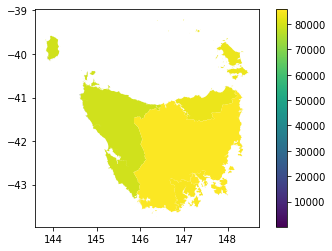

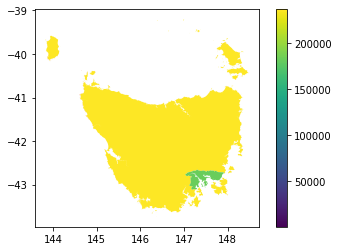

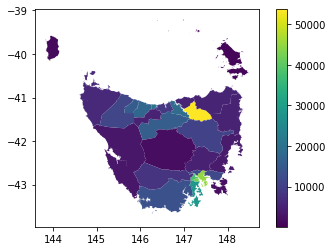

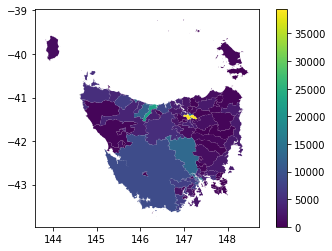

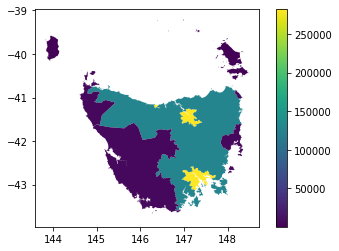

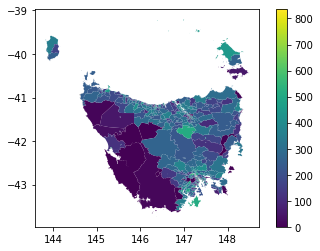

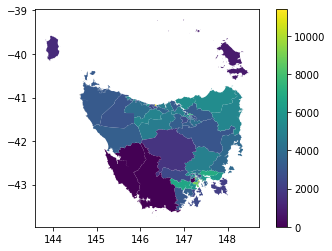

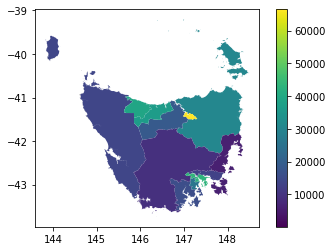

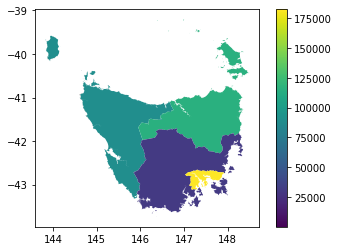

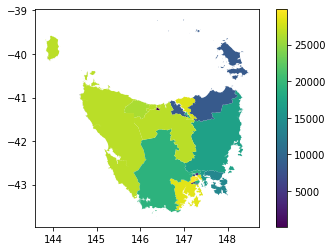

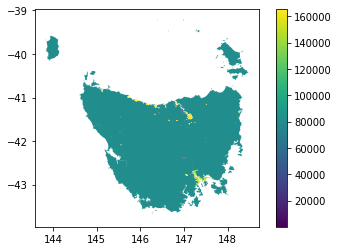

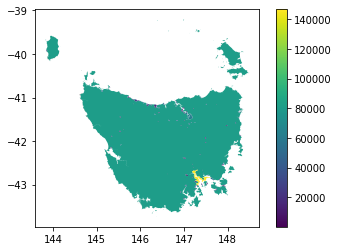

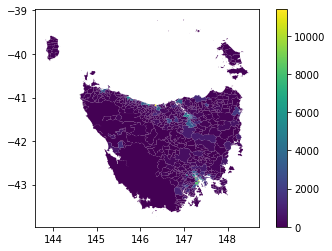

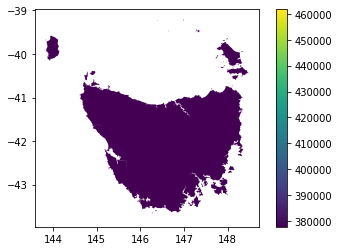

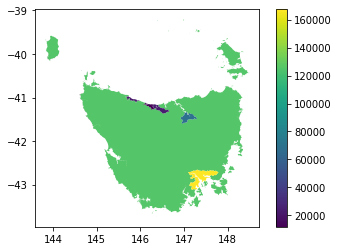

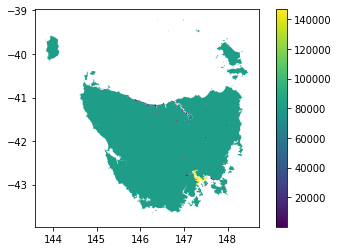

In [12]:
for x in gdf:
    x.plot(column='P_Tot_Total', legend=True)

### Importación desde GeoPackage con SQL
GeoPackage se construye sobre una base de datos SQLite, por lo que podemos usar sqlite3 para abrir determinadas tablas del fichero.

In [13]:
import sqlite3
file = "..//data//SpatialDataModel//vector//census2016_spcb_act_short.gpkg"
conn = sqlite3.connect(file)
cursor = conn.cursor()
cursor.execute("SELECT ced_code_2016 FROM census2016_spcb_act_ced_short;")
result = cursor.fetchone()
result

('CED801',)

### Importación desde Geojson

Podemos usar la biblioteca GeoPandas (basado en la biblioteca fiona, que es una interfaz de GDAL), para leer muchos de esos formatos de archivo GIS, usando la función geopandas.read_file.

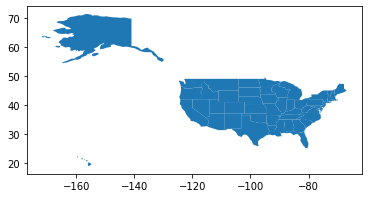

In [14]:
import geopandas as gpd

file = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
df = gpd.read_file(file)
df.plot()

### Importación desde SHP comprimido (.ZIP) con Geopandas
Los ficheros shapefiles incluyen varios ficheros asociados, por lo que se recomienda trabajar con ellos comprimidos en un zip. Con “read_file” de geopandas, también podemos abrir estos zip, añadiendo el “zip//” al inicio del path.

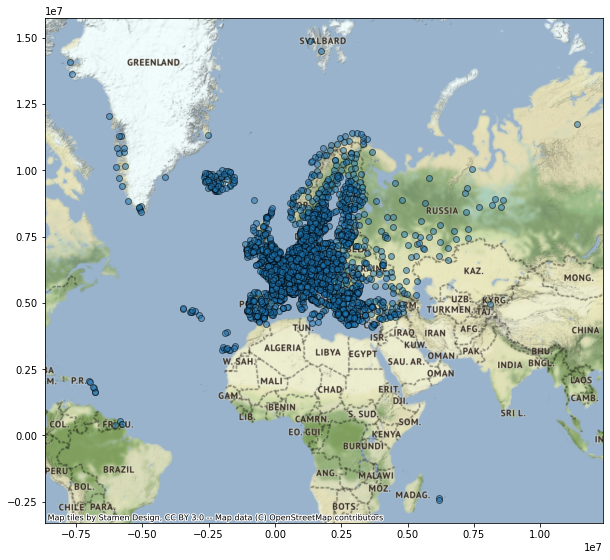

In [15]:
import geopandas as gpd
import contextily as ctx

file = "https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/SpatialDataModel/Airports-2013-SHP.zip"
df = gpd.read_file(file)
df = df.to_crs(epsg=3857)
ax = df.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax)

### Importación desde SHP con Pyshp

In [16]:
import shapefile as shp
file = "..//data//SpatialDataModel//vector//Airports-2013-SHP//AIRP_PT_2013.shp"
shp_file = shp.Reader(file)
shapes = shp_file.shapes()
fields = shp_file.fields
fields

[('DeletionFlag', 'C', 1, 0),
 ['OBJECTID', 'N', 10, 0],
 ['AIRP_ICAO_', 'C', 4, 0],
 ['AIRP_HIER', 'N', 10, 0],
 ['AIRP_NAME_', 'C', 100, 0],
 ['CNTR_CODE', 'C', 2, 0],
 ['AIRP_ICRG_', 'C', 2, 0],
 ['IATA_CODE', 'C', 3, 0],
 ['AIRP_PASS', 'N', 10, 0],
 ['PUBL_FLAG', 'C', 1, 0],
 ['IFR', 'C', 1, 0],
 ['VFR', 'C', 1, 0],
 ['AIRP_OWNR', 'C', 2, 0],
 ['AIRP_LAND', 'C', 1, 0],
 ['AIRP_TRAF', 'C', 1, 0],
 ['AIRP_INTR', 'C', 1, 0],
 ['AIRP_CITY', 'C', 100, 0],
 ['ALT', 'N', 10, 0],
 ['LAT_EUR', 'N', 19, 8],
 ['LON_EUR', 'N', 19, 8],
 ['AIRP_USE', 'N', 10, 0],
 ['AIRP_GROUP', 'C', 1, 0],
 ['AIRP_GETIS', 'C', 1, 0],
 ['AIRP_ID', 'N', 10, 0],
 ['AIRP_LCOV_', 'N', 10, 0]]

### Importación desde una  Geodatabase

#### Fiona & Geodataframe

In [17]:
import fiona 
import geopandas as gpd

gdb_file = "..//data//SpatialDataModel//vector//Election.gdb"
# recogemos todas las capas del fichero .gdb con fiona.listlayers, y generamos una lista con los geodataframes
gdf=[]
for layer in fiona.listlayers(gdb_file):
    gdf.append(gpd.read_file(gdb_file,layer=layer)) 
gdf[0].head()

ASSEMBLY                           NAME     Shape_Leng   Shape_Length  \
0         1  1 - Daniele Monroe-Moreno (D)  117922.431528  117922.431529   
1         2          2 - John Hambrick (R)   99058.366083   99058.366083   
2         3          3 - Selena Torres (D)   78747.004042   78747.004042   
3         4            4 - Connie Munk (D)  152737.612199  152737.612199   
4         5        5 - Brittney Miller (D)  102193.891097  102193.891097   

     Shape_Area                                           geometry  
0  4.541801e+08  MULTIPOLYGON (((772329.252 26823884.771, 77498...  
1  3.552218e+08  MULTIPOLYGON (((735591.996 26771353.401, 73577...  
2  2.168506e+08  MULTIPOLYGON (((756064.647 26786628.273, 75618...  
3  5.634361e+08  MULTIPOLYGON (((736466.282 26820157.201, 73676...  
4  3.121693e+08  MULTIPOLYGON (((757001.375 26763727.000, 75712...

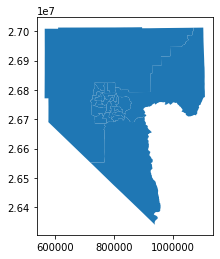

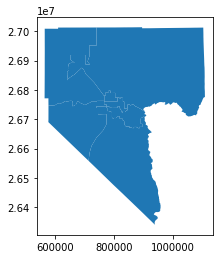

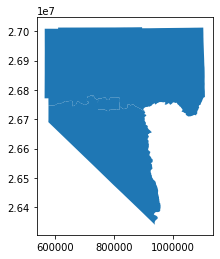

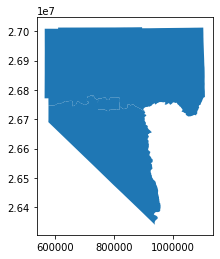

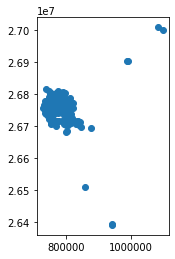

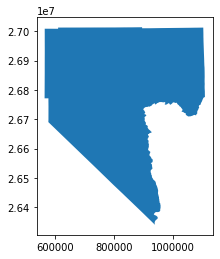

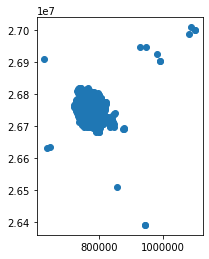

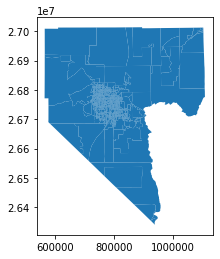

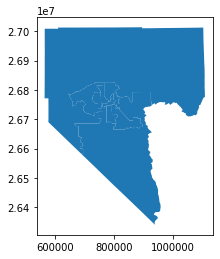

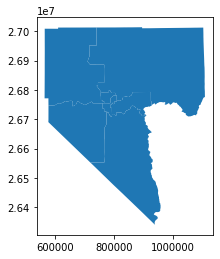

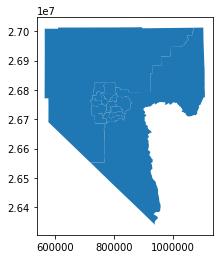

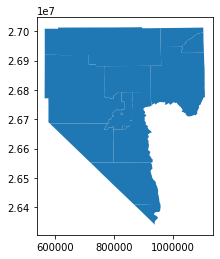

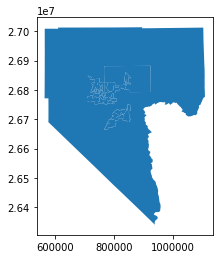

In [18]:
for img in gdf:
    img.plot()

#### Arcpy

In [19]:
#import arcpy  
#from arcpy import env
#env.workspace = "..//data//SpatialDataModel//vector//Election.gdb"
#fclist = arcpy.ListFeatureClasses()

### Importación desde KML necesita activación de fiona

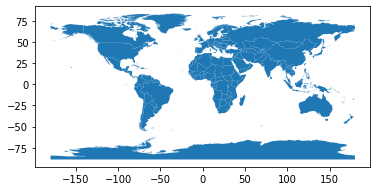

In [20]:
import geopandas as gpd
# Enable fiona driver
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw'
file = "https://opendata.arcgis.com/datasets/252471276c9941729543be8789e06e12_0.kml"
df = gpd.read_file(file, driver='KML')
df.plot()

### Importación desde PostGIS
En este caso enseñamos como conectar con la base de datos postgres que instalamos anteriormente en docker. 
Con una consulta SQL vemos las tablas que están creadas por defecto. En caso de tener datos geoespaciales podríamos realizar otra consulta para extraer los datos e importarlos a un geodataframe.

In [21]:
#import psycopg2
# Connect to database.
#conn = psycopg2.connect(user = "docker",password = "docker",host = "localhost",port = "25432",database = "postgres")
#if(conn):
#    print("Connection pool created successfully")

In [22]:
#sql= "select oid, spcname from pg_tablespace;"
# Execute query.
#cursor.execute(sql)
# Fetch the data returned.
#results = cursor.fetchall()
#results

### Importación de subconjuntos de datos
Dado que geopandas está basado en Fiona, el cual a su vez se basa en GDAL, podemos aprovechar el prefiltrado al cargar conjuntos de datos grandes, tanto mediante un área de interés o filtrando filas del dataset. De esta manera podemos recudir el dataset antes de cargarlo en memoria, es una forma muy optima de trabajar para capas muy grandes, así restringimos la carga a nuestra zona de interés.

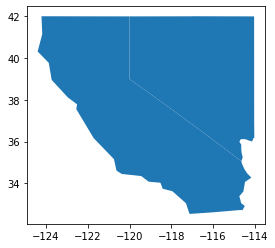

In [23]:
import geopandas as gpd

file = "https://d2ad6b4ur7yvpq.cloudfront.net/naturalearth-3.3.0/ne_110m_admin_1_states_provinces_shp.geojson"
California_bbox = (-124.1795713, 41.8155491, -117.2726805, 34.2399345)
gdf = gpd.read_file(file, bbox=California_bbox)
gdf.plot()

## Importación desde raster

Los datos raster se suelen servir en GeoTIFF y otros formatos para organizar y almacenar conjuntos de datos en mallas o arrays, como imágenes satelitales y modelos de terreno. Rasterio lee y escribe estos formatos y proporciona una API de Python basada en matrices Numpy N-dimensional y GeoJSON.
Rasterio posibilita en python el acceso para el manejo de datos ráster. Permite leer/escribir archivos ráster en y desde matrices numpy, ofrece muchas maneras convenientes de manipular estas matrices y puede manejar transformaciones de coordenadas.

### Importación desde Geotiff

In [24]:
import rasterio as rio
Sentinel_image = r"https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/SpatialDataModel/raster/S2A_MSIL2A_20190310T105851_N0211_R094_T30TVK_20190310T135315_0.tif"
with rio.open(Sentinel_image,'r') as img:
    raster = img.read()

print ("Los datos que se abren con rasterio estan en formato: " + str(type(img)))
print ("Una vez se abren las capas se conviernten en un array de numpy: " + str(type(raster)))
print ("En este caso seria un array multidimensional, con 6 bandas y dimensiones 337 x 396: "+ str(raster.shape))
print ("Los metadatos asociados al fichero raster se ecuentran en el diccionario: "+ str(img.meta))

Los datos que se abren con rasterio estan en formato: <class 'rasterio.io.DatasetReader'>
Una vez se abren las capas se conviernten en un array de numpy: <class 'numpy.ndarray'>
En este caso seria un array multidimensional, con 6 bandas y dimensiones 337 x 396: (6, 337, 396)
Los metadatos asociados al fichero raster se ecuentran en el diccionario: {'driver': 'GTiff', 'dtype': 'float64', 'nodata': 0.0, 'width': 396, 'height': 337, 'count': 6, 'crs': CRS.from_epsg(32630), 'transform': Affine(20.0, 0.0, 436680.0,
       0.0, -20.0, 4478940.0)}


### Importación desde Cloud optimized geotiff (COG)
Una sola escena de un satélite (Landsat o Sentinel) puede soponer aproximadamente de 1-2 Gb, ya que contiene una gran variedad de datos para cada banda de imágenes. Las imágenes a menudo se agrupan en un solo archivo .tar.gz.
Para evitar la descarga, se ha propuesto un nuevo formato para el almacenamiento en la nube llamado Geotiffs (COG) optimizado para la nube, para permitir un fácil acceso a bandas individuales o incluso subconjuntos de imágenes individuales.

En sentido estricto, las imágenes de Landsat y Sentinel en AWS y Google Cloud no son COG (puede validar el formato con herramientas en línea como esta: http://cog-validate.radiant.earth/html). Sin embargo, los archivos se almacenan como Geotiffs en mosaico, por lo que muchas funciones COG aún funcionan.

In [25]:
import rasterio as rio
print('Landsat on Google:')
filepath = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rio.open(filepath) as src:
    print(src.profile)

Landsat on Google:
{'driver': 'GTiff', 'dtype': 'uint16', 'nodata': None, 'width': 7821, 'height': 7951, 'count': 1, 'crs': CRS.from_epsg(32611), 'transform': Affine(30.0, 0.0, 204285.0,
       0.0, -30.0, 4268115.0), 'blockxsize': 256, 'blockysize': 256, 'tiled': True, 'compress': 'lzw', 'interleave': 'band'}


### Subconjunto de datos COG
Una muy buena característica de los COG es que puede solicitar un subconjunto de la imagen y solo ese subconjunto se descargará.

Text(0, 0.5, 'Row #')

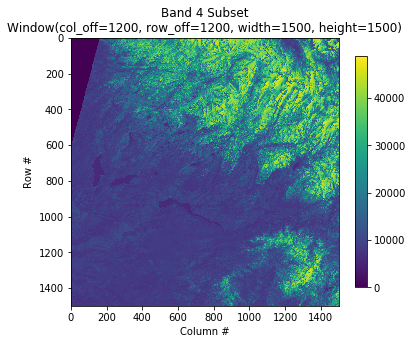

In [26]:
import matplotlib.pyplot as plt
window = rio.windows.Window(1200, 1200, 1500, 1500)
filepath = 'https://storage.googleapis.com/gcp-public-data-landsat/LC08/01/042/034/LC08_L1TP_042034_20170616_20170629_01_T1/LC08_L1TP_042034_20170616_20170629_01_T1_B4.TIF'
with rio.open(filepath) as src:
    subset = src.read(1, window=window)

plt.figure(figsize=(6,8.5))
plt.imshow(subset)
plt.colorbar(shrink=0.5)
plt.title(f'Band 4 Subset\n{window}')
plt.xlabel('Column #')
plt.ylabel('Row #')

### Importación desde Copernicus Open Access Hub
En algunos casos en los que necesitemos descargar todo el conjunto de datos en un Zip, podemos usar el Copernicus Open Access Hub (https://scihub.copernicus.eu/). 
En Python la libreria Sentinelsat facilita el acceso y descarga de estos datos.


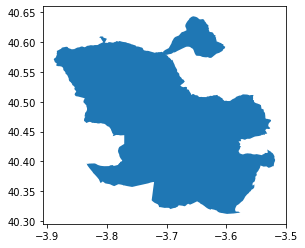

In [27]:
from sentinelsat import SentinelAPI
import geopandas as gpd

user = 'census'
password = 'Census_2020'
api = SentinelAPI(user, password, 'https://scihub.copernicus.eu/apihub')
gdf = gpd.read_file('https://minsait-geospatial.s3.eu-west-3.amazonaws.com/data/SpatialDataModel/Madrid_muni.geojson')
gdf.plot()

In [28]:
# Simplificamos el poligono para que tenga menos vertices
gdf["geometry"] = gdf.simplify(0.05, preserve_topology=True)
footprint = None
for i in gdf['geometry']:
    footprint = i

# Llamamos a las query con los filtos de nubes y fechas
products = api.query(footprint,
                     date = ('20190601', '20190801'),
                     platformname = 'Sentinel-2',
                     processinglevel = 'Level-2A',
                      cloudcoverpercentage=(0, 10))

# Pasamos la query dataframe y sacamos el numero total de imagenes
products_gdf = api.to_geodataframe(products)
products_gdf.head()

SentinelAPIError: HTTP status 503 Service Unavailable: 
The Copernicus Open Access Hub

# The Copernicus Open Access Hub will be back soon!

Sorry for the inconvenience,  
we're performing some maintenance at the moment.  

We'll be back online shortly!

In [ ]:
import requests
from PIL import Image
import io

def show_quicklook(id_ ,username ,password):
      url ="https://scihub.copernicus.eu/apihub/odata/v1/Products('{}')/Products('Quicklook')/$value".format(id_)
      bytes_img = requests.session().get(url, auth=(username,password)).content
      return Image.open(io.BytesIO(bytes_img))

images = []
for index, row in products_gdf.iterrows():
    x = products_gdf.loc[index,'uuid']
    print (x)       
    images.append(show_quicklook(x,user,password))

In [ ]:
# Pintamos las 5 primeras imágenes
plt.figure(figsize=(30,30))
image= images[:5]
for i, img in enumerate(image):
    plt.subplot(5,5,i+1)
    plt.axis('off')
    plt.imshow(img)
plt.show()

### Importación desde HDF5
Los archivos HDF son formatos de archivo de código abierto que admiten grandes cantidades de datos, complejos y heterogéneos, utilizando una estructura similar a un "directorio de archivos". Los formatos HDF también permiten incrustar metadatos, lo que los hace autodescriptivos. HDF4 es un formato de datos jerárquico más antiguo en comparación con HDF5, que es la última versión promovida por HDF Group.

In [ ]:
import h5py

hdf_image= r"..//data//SpatialDataModel//raster//pansharp_2_Vegas_img4.h5"
hf = h5py.File(hdf_image, 'r')
## Comprobamos los datos en el fichero
hf.keys()

### Importación desde NetCDF

In [ ]:
from scipy.io import netcdf

nc_file= r"..//data//SpatialDataModel//raster//tos_O1_2001-2002.nc"
nc = netcdf.netcdf_file(nc_file,'r')
print (nc.dimensions)

### Importación desde WMS

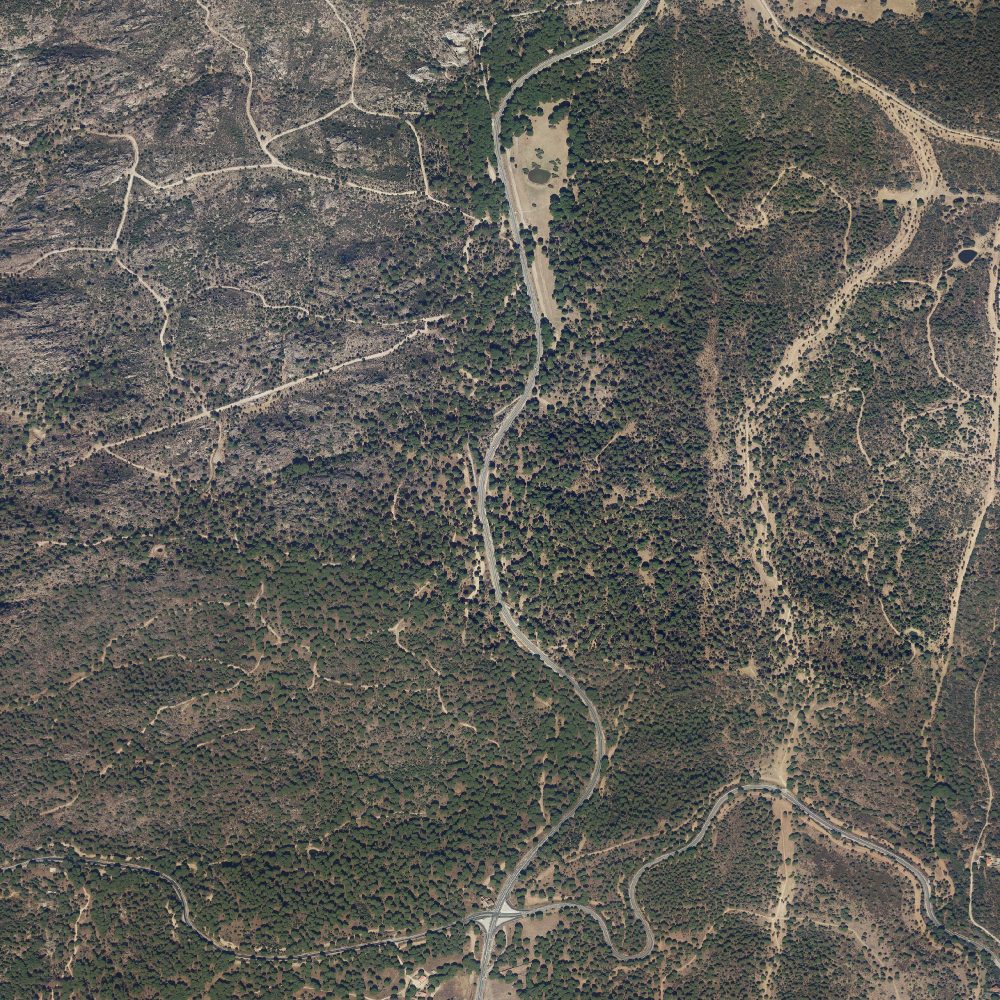

In [3]:
from owslib.wms import WebMapService
from IPython.display import Image

wms_url = "http://www.ign.es/wms-inspire/pnoa-ma?"
wms = WebMapService(wms_url)
my_layer = list(wms.contents)[1]
l = u'my_layer.encode("utf-8")'
img = wms.getmap(layers=[my_layer],
                 styles=['default'],
                 srs='EPSG:23030',
                 bbox=(382607.761704,4460699.390290,384793.9367174,4463504.981749),                 
                 size=(1000, 1000),
                 format='image/png',
                 transparent=True)

# Si quisieramos guardar la imágen
#out = open('sw_test.jpg', 'wb')
#out.write(img.read())
#out.close()

Image(img.read())